<a href="https://colab.research.google.com/github/Maralmaa1/DIV-tasks/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Hypothetical function

Implement the logistic regression hypothesis function methods in the ScratchLogisticRegression class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [2]:
class ScratchLogisticRegression():
    def __init__(self, num_iter=100, lr=0.01, C=1, random_state=None, bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.C = C
        self.lamda = 1/self.C
        self.random_state = random_state
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _linear_combination(self,X):

        x1 = X

        if self.bias == True:
          x0 = np.ones(x1.shape[0])
        else:
          x0 = np.zeros(x1.shape[0])

        return np.concatenate([x0.reshape(-1,1),x1],axis=1)

    def _hypothetical_function(self,X):
        
        x = X
        z = np.dot(x,self.theta)

        return 1/(1+np.exp(-z))

    def _gradient_descent(self, X, error):
    
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)

    def _loss_function(self, y, yhat):

        return np.mean(-y*np.log(yhat)-(1-y)*np.log(1-yhat))+0.5*self.lamda*np.mean(self.theta[1:]**2)


    def fit(self, X, y, X_val=False, y_val=False):
      
        self.ylabel=np.unique(y)
        y=np.where(y==self.ylabel[0],0,1)
        if(type(y_val) != bool):
          y_val = np.where(y_val==self.ylabel[0],0,1)

        X = self._linear_combination(X)
        np.random.seed(self.random_state)
        self.theta = np.random.rand(X.shape[1])

        for i in range(self.iter):
          yhat = self._hypothetical_function(X)

          error = yhat - y
          self.loss[i] = self._loss_function(y,yhat)

          if(type(X_val)!=bool):
            val_X = self._linear_combination(X_val)
            val_yhat = self._hypothetical_function(val_X)

            self.val_loss[i] = self._loss_function(y_val,val_yhat)

          self._gradient_descent(X,error)

          if(self.verbose):
            print('n_iter:',i, 'loss:', self.loss[i], 'theta:',self.theta)

        np.save('theta', self.theta)

    def predict(self,X):

        X = self._linear_combination(X)
        yhat = self._hypothetical_function(X)

        return np.where(yhat<0.5,self.ylabel[0],self.ylabel[1])

    def predict_proba(self, X):

        X = self._linear_combination(X)

        return self._hypothetical_function(X)


In [3]:
x1 = np.arange(1,11,1).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

print('x:\n',x)

x:
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


In [4]:
# parameters 0
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [0.27806265 0.7730528 ]


In [5]:
# linear combination
z = np.dot(x,theta)
print('z:\n',z)

z:
 [1.05111545 1.82416825 2.59722105 3.37027385 4.14332664 4.91637944
 5.68943224 6.46248504 7.23553784 8.00859064]


In [6]:
# Try it 
z1 = np.arange(-50,50,0.1)
y1 = 1/(1+np.exp(-z1))

[]

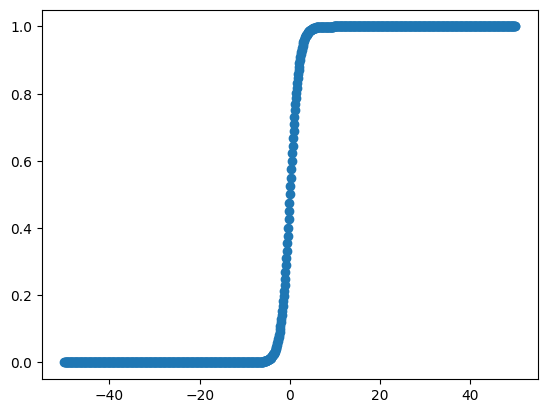

In [7]:
plt.scatter(z1,y1)
plt.plot()

【Question 2】The steepest descent method

Implement learning by the steepest descent method. Add the parameter update formula method _gradient_descent represented by the formula below and call it from the fit method.

In [8]:
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

y = np.array([0.4,0.5,0.2,0.1,0.9])
yhat = np.where(y<0.5,0,1)
y_test = np.array([1,1,0,0,1])

print('x:\n',x)
print('y:\n',y)
print('yhat:\n',yhat)
print('ytest:\n',y_test)


x:
 [[1. 2.]
 [1. 1.]
 [1. 5.]
 [1. 6.]
 [1. 4.]]
y:
 [0.4 0.5 0.2 0.1 0.9]
yhat:
 [0 1 0 0 1]
ytest:
 [1 1 0 0 1]


In [9]:
# Parameters 0
theta = np.random.rand(x.shape[1])
print('theta:\n',theta)


theta:
 [0.95241107 0.00534836]


In [10]:
# Error of yhat, y
error = yhat - y_test
print('error:\n',error)

error:
 [-1  0  0  0  0]


In [11]:
# lamda 
lm = np.array([0,1])
theta*lm

array([0.        , 0.00534836])

In [12]:
# Update parameters 
0.01*np.dot(error,x)/len(x) + theta*lm/len(x)

array([-0.002     , -0.00293033])

In [13]:
theta -= (0.01*np.dot(error,x)/len(x) + theta*lm/len(x))
print('theta:\n',theta)

theta:
 [0.95441107 0.00827869]


In [14]:
theta -= (0.01*np.mean(np.dot(error,x)) + theta*lm/len(x))
theta

array([0.96941107, 0.02162295])

[Question 3] Presumption

Please implement a mechanism to estimate. Add the predict and predict_proba methods included in the ScratchLogisticRegression class skeleton.

The return value of predict_proba is the output of the hypothetical function $h_\theta(x)$ , and the return value of predict is the label of 1 and 0 by setting a threshold on that value.

In [15]:
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x2 = np.array([2,1,5,2,4]).reshape(-1,1)
y = np.array([1,0,0,0,1])

print('x1:\n',x1)
print('x2:\n',x2)
print('y:\n',y)

x1:
 [[2]
 [1]
 [5]
 [6]
 [4]]
x2:
 [[2]
 [1]
 [5]
 [2]
 [4]]
y:
 [1 0 0 0 1]


In [16]:
clf = ScratchLogisticRegression()
clf.fit(x1,y,x1,y)

y_proba = clf.predict_proba(x2)
y_pred = clf.predict(x2)

print('y_proba:\n',y_proba)
print('y_pred:\n',y_pred)

y_proba:
 [0.43696224 0.46835487 0.34666078 0.43696224 0.37589711]
y_pred:
 [0 0 0 0 0]


[Question 4] Objective function

Implement the logistic regression objective function (loss function) given by the following formula : And be sure to record this in self.loss, .self.val_loss

Note that this formula includes a regularization term.

*If you can't see the formula, please view it in full screen.

In [17]:
# check data creation
y1 = np.ones(99)
y2 = np.zeros(99)
yh = np.arange(0.01,1.0,0.01)

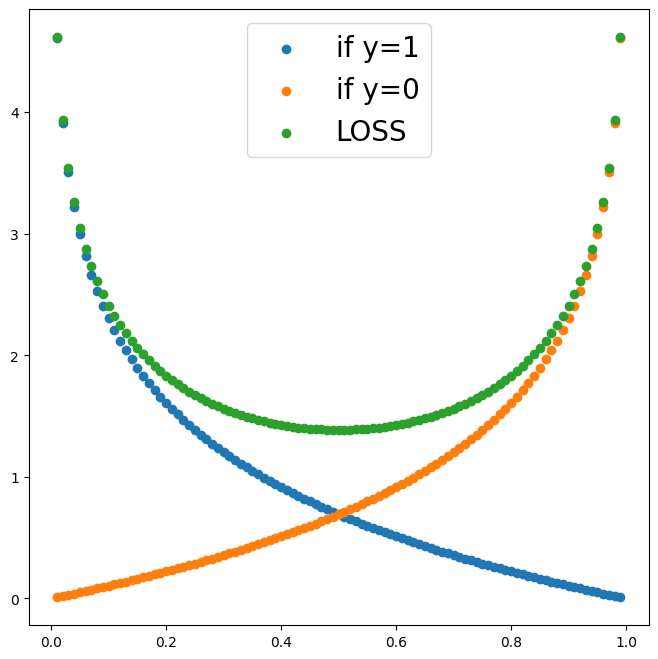

In [18]:
# Try to imagine the objectionve function J with check data 

J1 = -y1*np.log(yh)-(1-y1)*np.log(1-yh)
J2 = -y2*np.log(yh)-(1-y2)*np.log(1-yh)
J = -y1*np.log(yh)-(1-y2)*np.log(1-yh)

# Plotting the learning Curve 

fig,ax = plt.subplots(figsize=(8,8))

plt.rcParams['font.size'] = 20
plt.scatter(yh,J1,label='if y=1')
plt.scatter(yh,J2,label='if y=0')
plt.scatter(yh,J,label='LOSS')
plt.legend()

[Question 5] Learning and Estimation

Please train and estimate the scratch implementation for the binary classification of virgicolor and virginica of the iris dataset prepared in the Sprint of Introduction to Machine Learning Scratch.

Compare it with the scikit-learn implementation to see if it works.

Please use scikit-learn for index values ​​such as Accuracy, Precision, and Recall.



In [19]:
from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target.reshape(-1,1)

In [20]:
import pandas as pd 

iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
iris.shape

(150, 5)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

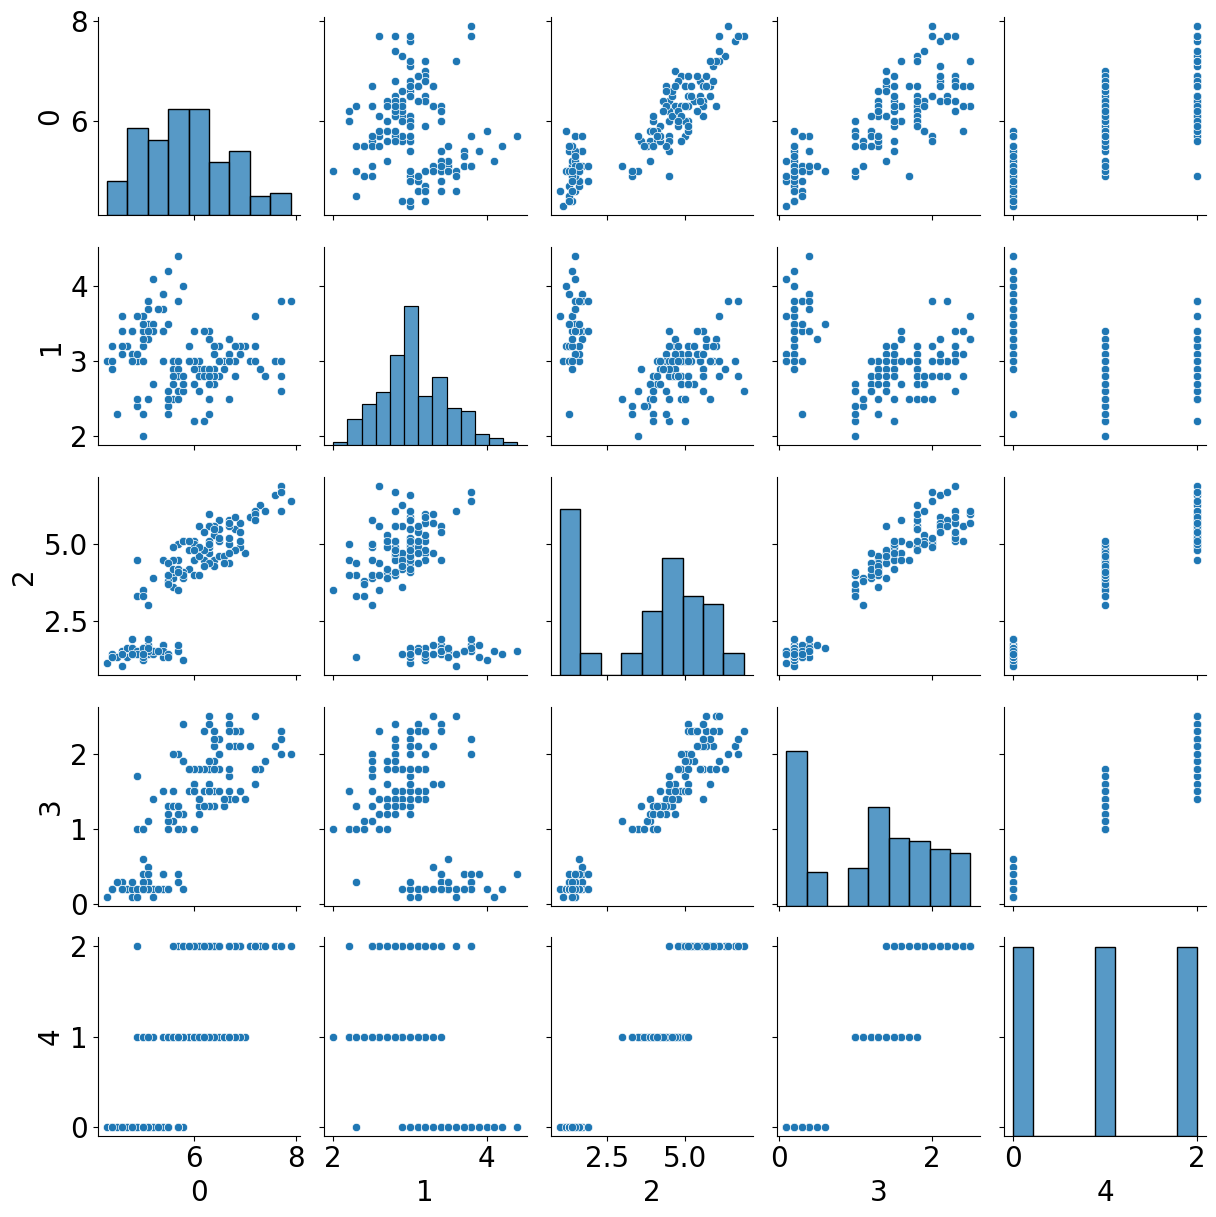

In [21]:
disp = False
if disp != True:
  sns.pairplot(iris,palette='tab10')

In [22]:
iris_X = iris.loc[iris[4]!=0,2:3].values
iris_y = iris.loc[iris[4]!=0,4].values

print('iris_X.shape:',iris_X.shape)
print('iris_y.shape:',iris_y.shape)

iris_X.shape: (100, 2)
iris_y.shape: (100,)


In [23]:
# Train and estimate on Iris datase

from sklearn.model_selection import train_test_split
X = iris_X
y = iris_y

X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (80, 2)
y_train.shape: (80,)
X_valid.shape: (20, 2)
y_valid.shape: (20,)


In [24]:
np.unique(y)

array([1., 2.])

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [26]:
clf = ScratchLogisticRegression(num_iter=500, lr=0.01,C=0.01,verbose=False)
clf.fit(X_train_std,y_train,X_valid_std,y_valid)

y_pred = clf.predict(X_valid_std)
y_prob = clf.predict_proba(X_valid_std)

In [27]:
y_valid

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1.])

In [28]:
y_pred

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [29]:
y_prob

array([0.45725497, 0.65174713, 0.47852921, 0.67646654, 0.59783331,
       0.65797031, 0.45043013, 0.52141282, 0.63848619, 0.61218774,
       0.57039143, 0.5496893 , 0.61184829, 0.4502532 , 0.30491735,
       0.34852466, 0.47852921, 0.40857536, 0.50694348, 0.42920139])

In [30]:
# Evaluation index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid,y_pred)
precision = precision_score(y_valid,y_pred)
recall = recall_score(y_valid,y_pred)
f1 = f1_score(y_valid,y_pred)

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)

accuracy: 0.95
precision: 1.0
recall: 0.9
f1: 0.9473684210526316


[Question 6] Learning curve plot

Look at the learning curve to see if the loss is dropping properly.

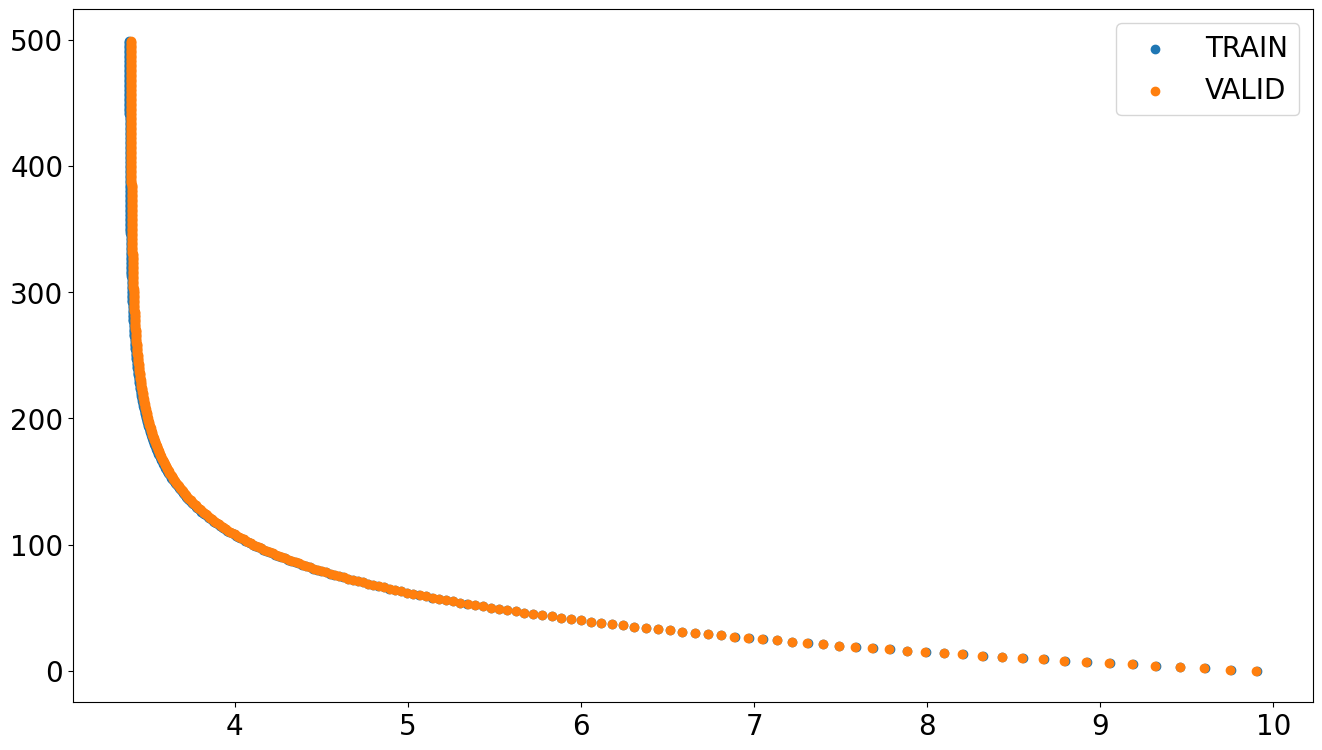

In [31]:
# plotting the learning curve

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams['font.size'] = 20
plt.scatter(clf.loss,range(len(clf.loss)),label='TRAIN')
plt.scatter(clf.val_loss,range(len(clf.val_loss)),label='VALID')
plt.legend()

[Problem 7] Visualization of the decision region

Visualize the decision region.

In [32]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

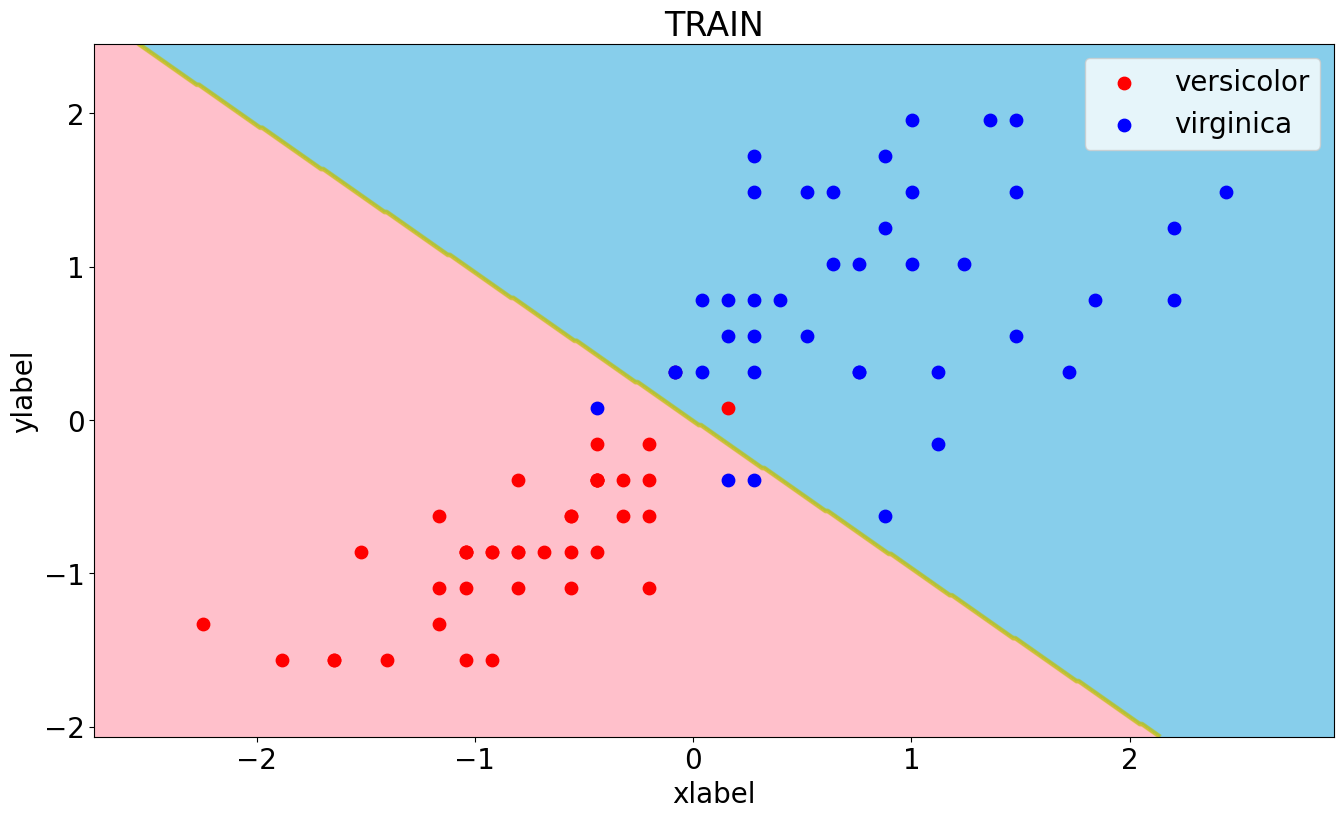

In [33]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf,title='TRAIN')

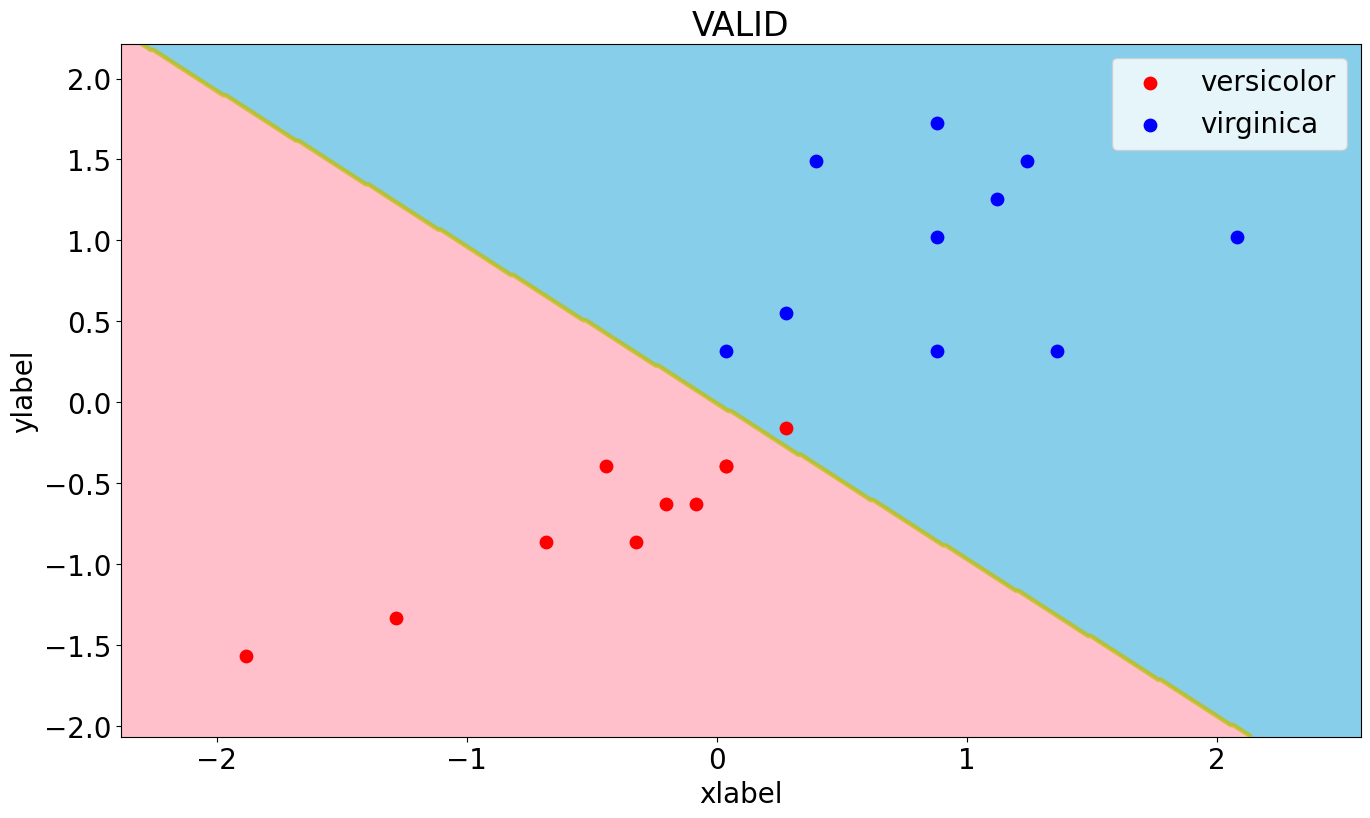

In [34]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf,title='VALID')